In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import random
import tensorflow as tf
tf.config.run_functions_eagerly(True)
import tensorflow_hub as hub
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, InputLayer, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16
import warnings
warnings.filterwarnings("ignore") 
plt.rcParams['font.size'] = 10

In [5]:
train_dir = r"/Users/anshmadan/Coding/IML Final Project/Birds_25/train"
#val_dir = '/kaggle/input/indian-birds/Birds_25/valid'

# Get class names from directory names
class_names = [cls for cls in os.listdir(train_dir) if not cls.startswith('.')]

print("Class names:", class_names)

Class names: ['Coppersmith-Barbet', 'Cattle-Egret', 'White-Breasted-Waterhen', 'Asian-Green-Bee-Eater', 'Common-Myna', 'Hoopoe', 'Gray-Wagtail', 'Jungle-Babbler', 'White-Wagtail', 'Common-Tailorbird', 'Common-Rosefinch', 'Rufous-Treepie', 'Ruddy-Shelduck', 'Sarus-Crane', 'Red-Wattled-Lapwing', 'Common-Kingfisher', 'House-Crow', 'White-Breasted-Kingfisher', 'Forest-Wagtail', 'Northern-Lapwing', 'Indian-Peacock', 'Indian-Pitta', 'Indian-Grey-Hornbill', 'Brown-Headed-Barbet', 'Indian-Roller']


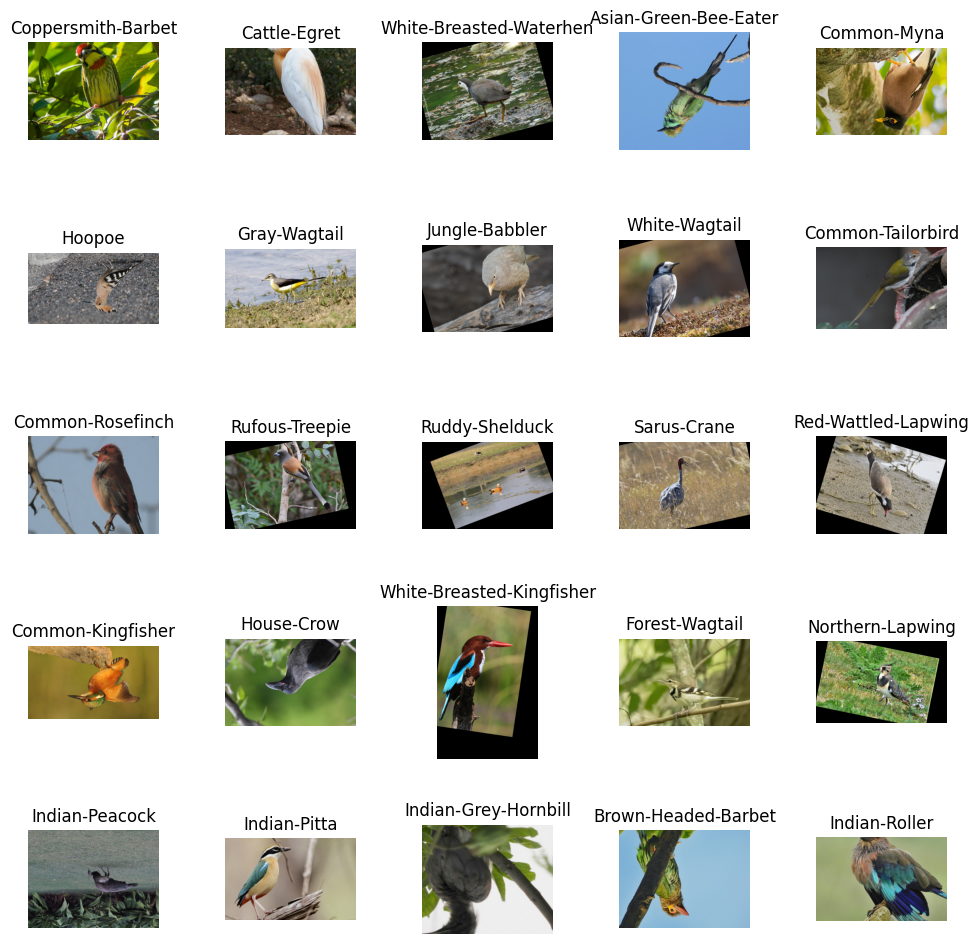

In [7]:
# Create a figure with subplots for each class
fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))
fig.tight_layout()

# Load and display a random image from each class
for i, cls in enumerate(class_names):
    ax = axs[i // 5][i % 5]
    img_path = os.path.join(train_dir, cls, os.listdir(os.path.join(train_dir, cls))[np.random.randint(0, len(os.listdir(os.path.join(train_dir, cls))))])
    img = plt.imread(img_path)
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(cls)
    
plt.show()

In [9]:
# Define the data generators
with tf.device('/device:GPU:0'):
    train_datagen = ImageDataGenerator(rescale=1./255, 
                                       shear_range=0.2, 
                                       zoom_range=0.2, 
                                       horizontal_flip=True)
    
    valid_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(r"/Users/anshmadan/Coding/IML Final Project/Birds_25/train", 
                                                        target_size=(224, 224), 
                                                        batch_size=32, 
                                                        class_mode='categorical')
    valid_generator = valid_datagen.flow_from_directory(r"/Users/anshmadan/Coding/IML Final Project/Birds_25/valid", 
                                                        target_size=(224, 224), 
                                                        batch_size=32, 
                                                        class_mode='categorical')

Found 30000 images belonging to 25 classes.
Found 7500 images belonging to 25 classes.


In [10]:
with tf.device('cpu'):
    # Load the ResNet50 model
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 17s 0us/step


In [11]:
model = Sequential([
    # Convolutional layers
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten the output before passing to Dense layers
    Flatten(),

    # Fully connected layers
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(25, activation='softmax')  # 25 classes for 25 bird types
])


In [12]:
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)


In [16]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=10,
    callbacks=[early_stopping]
)


FileNotFoundError: [Errno 2] No such file or directory: '/Users/anshmadan/Coding/IML Final Project/Birds_25/train/Gray-Wagtail/Gray-Wagtail_371.jpg'